In [384]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
print("Imports completed")

Imports completed


Linear Regression Model adapted with changes from https://towardsdatascience.com/linear-regression-from-scratch-with-numpy-implementation-finally-8e617d8e274c <br>
abline function from https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib <br>
Dataset- National Unemployment from https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html

### Reading Data from Excel file

In [393]:
df = pd.read_excel("slr04.xls", names = ['Unemployment Male','Unemployment Female'])
df

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,Unemployment Male,Unemployment Female
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


### Let's say we want to predict the female unemployment rate given the male unemployment rate for a given city. So here, the predictor variable (X) is Unemployment Male and the response variable (y) is Unemployment Female

### Normalizing data - using mean normalization - done so that Regression is more effective

In [394]:
normalized_df = (df-df.mean())/df.std()
normalized_df

,Unemployment Male,Unemployment Female
0,-1.780729,-1.193993
1,0.435090,1.392992
2,-0.614508,-0.433115
3,1.134822,1.240817
4,2.242731,1.773432
5,0.551712,0.403851
6,0.085224,0.327763
7,0.143535,0.175587
8,0.026913,-0.280940
9,-0.497886,-1.041818


### Splitting the data into training and testing data using train_test_split

In [395]:
train, test = train_test_split(normalized_df, test_size = 0.2, random_state = 42)
train.shape

(10, 2)

In [396]:
test.shape

(3, 2)

### Quick visualization of the data - easy to do since only 2 variables

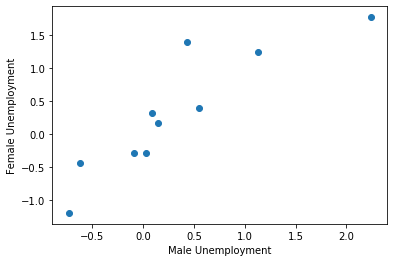

In [405]:
plt.scatter(train['Unemployment Male'], train['Unemployment Female']);
plt.xlabel('Male Unemployment');
plt.ylabel('Female Unemployment');

### Allocating names to the predictor and response variables- X is predictor, y is response. As a reminder, we want to predict Female Unemployment given Male Unemployment

In [398]:
X = train['Unemployment Male']
y = train['Unemployment Female']
X_test = test['Unemployment Male']
y_test = test['Unemployment Female']

# <span style='color: red'>  Running Linear Regression manually </span>
### I have defined a few functions that help us implement linear regression from scratch. You will do something similar using the math explained in lecture - don't worry too much about it now. 

### Need to know - run_linear_regression(n): n is the number of times we want to run linear regression (0 will just give a line parallel to the x axis)

### <span style='color: red'> Main focus- notice how the line becomes closer to an ideal fit as the number of times we run linear regression increases. Also notice the effect on the cost (which is the same as RMSE here) </span>

Initial cost is:  0.43487659496415665 

Optimal parameters are: 
 [[0.245461 ]
 [0.6147268]] 

Final cost is:  [0.09606308]


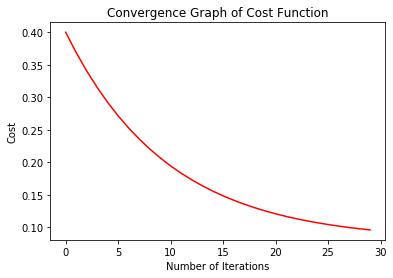

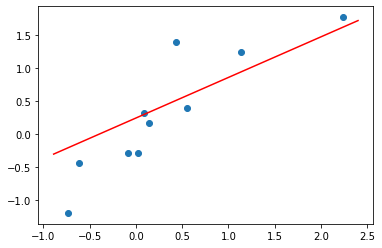

In [400]:
test_params = run_linear_regression(30)
abline(test_params[1], test_params[0])

## <span style='color: red'> Using external data science library - scikit learn </span>

### Need to know - LinearRegression() creates a new Regressor object that we can fit to a particular set of predictor and response variables by using .fit(). After we fit it, we can display the coefficients and intercepts of the regression line by calling .coef_ and .intercept_

In [401]:
lr = LinearRegression()
model = lr.fit(X, y)

coef, intercept = model.coef_[0], model.intercept_[0]
coef, intercept

(array([0.        , 0.78273128]), 0.31254535167429554)

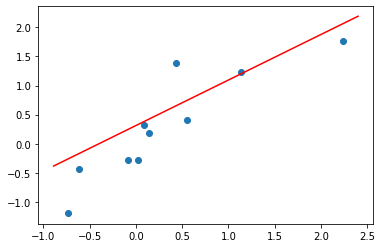

In [402]:
_, slope = coef
abline(slope, intercept)

### Notice how close we got with manual implementation!! Scikit makes it much easier

In [403]:
print("Manual: ", optimal_params)
print("Scikit: ", intercept, slope)

Manual:  [[0.03047317]
 [0.0763163 ]]
Scikit:  0.31254535167429554 0.7827312767579231


## Run below cells first- not shown in lecture

In [399]:
def compute_cost(X, y, params):
    n_samples = len(y)
    h = X @ params
    return (1/(2*n_samples))*np.sum((h-y)**2)

def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y) 
        J_history[i] = compute_cost(X, y, params)

    return (J_history, params)

X = np.array(X).reshape([len(X),1])
y = np.array(y).reshape([len(y),1])
X_test = np.array(X_test).reshape([len(X_test),1])
y_test = np.array(y_test).reshape([len(y_test),1])

n_samples = len(y)

mu = np.mean(X, 0)
sigma = np.std(X, 0)

X = (X-mu) / sigma

X = np.hstack((np.ones((n_samples,1)),X))
n_features = np.size(X,1)
params = np.zeros((n_features,1))

def run_gradient_descent(n_iters, learning_rate, X, y, params):
    initial_cost = compute_cost(X, y, params)

    print("Initial cost is: ", initial_cost, "\n")

    (J_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)

    print("Optimal parameters are: \n", optimal_params, "\n")

    print("Final cost is: ", J_history[-1])

    plt.plot(range(len(J_history)), J_history, 'r')
    
    plt.title("Convergence Graph of Cost Function")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.show()
    return optimal_params
def abline(slope, intercept):
    plt.scatter(train['Unemployment Male'], train['Unemployment Female']);
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals,  color='r')
def run_linear_regression(n):
    return run_gradient_descent(n, 0.05, X, y, params)